<a href="https://colab.research.google.com/github/Jyotishmoy12/MachineLearning/blob/main/SOCpredictionUsingRandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detailed Relation Between Code and Mathematics in Battery SOC Prediction

## 1. State of Charge (SOC) Calculation

Code:
```python
max_capacity = 2.0  # 2000 mAh = 2.0 Ah
df['SOC'] = df['Charge_Capacity(Ah)'] / max_capacity * 100
```

Mathematics:
SOC = (Charge_Capacity / Max_Capacity) * 100%

Explanation:
We're directly implementing the SOC formula. We divide the current charge capacity by the maximum capacity (2.0 Ah) and multiply by 100 to get a percentage.

## 2. Feature Selection

Code:
```python
features = ['Voltage(V)', 'Current(A)', 'Charge_Capacity(Ah)', 'Discharge_Capacity(Ah)',
            'Internal_Resistance(Ohm)', 'Step_Time(s)']
X = df[features]
y = df['SOC']
```

Mathematics:
This step doesn't involve complex math, but it's based on the understanding that these features are related to SOC through various physical and chemical processes in the battery.

## 3. Data Preprocessing (Scaling)

Code:
```python
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
```

Mathematics:
For each feature: X_scaled = (X - μ) / σ
Where μ is the mean and σ is the standard deviation of the feature.

Explanation:
StandardScaler subtracts the mean from each feature and divides by the standard deviation. This centers the data around 0 with a standard deviation of 1.

## 4. Random Forest Regressor

Code:
```python
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
```

Mathematics:
For each tree in the forest:
1. At each node, find the best split by maximizing variance reduction:
   Variance Reduction = Var(parent) - (N_left/N) * Var(left) - (N_right/N) * Var(right)
2. Repeat until a stopping criterion is met (e.g., max depth reached)

For prediction:
SOC_predicted = (1/n) * Σ(Tree_i_prediction), for i = 1 to n

Explanation:
The RandomForestRegressor creates multiple decision trees. Each tree is trained on a bootstrap sample of the data. At each node, it considers a random subset of features and chooses the best split. The final prediction is the average of all tree predictions.

## 5. Model Evaluation

Code:
```python
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
```

Mathematics:
MSE = (1/n) * Σ(y_i - ŷ_i)^2, for i = 1 to n
R² = 1 - (Σ(y_i - ŷ_i)^2) / (Σ(y_i - ȳ)^2)

Explanation:
- MSE calculates the average squared difference between predicted and actual SOC values.
- R² compares the model's performance to a baseline model that always predicts the mean SOC.

## 6. Feature Importance

Code:
```python
feature_importance = pd.DataFrame({'feature': features, 'importance': rf_model.feature_importances_})
```

Mathematics:
Importance(feature_j) = (1/n_trees) * Σ(impurity_decrease(node_i)), for all nodes i using feature j

Explanation:
The importance of a feature is calculated as the average impurity decrease across all nodes and all trees where that feature is used for splitting.

## 7. Visualization

Code (example for SOC vs. Voltage plot):
```python
plt.scatter(df['Voltage(V)'], df['SOC'], alpha=0.5)
plt.title('State of Charge vs. Voltage')
plt.xlabel('Voltage (V)')
plt.ylabel('State of Charge (%)')
```

Mathematics:
While plotting itself doesn't involve complex math, understanding the relationships shown in these plots often involves statistical concepts:

- Correlation: r = Σ((x_i - x̄)(y_i - ȳ)) / √(Σ(x_i - x̄)^2 * Σ(y_i - ȳ)^2)
- Distribution parameters (for histograms): mean, standard deviation, skewness, etc.

Explanation:
These plots visualize relationships between variables (e.g., Voltage and SOC) or distributions of variables (e.g., SOC distribution). They help in understanding the underlying patterns in the data and the performance of our model.

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('10_16_2015_Initial capacity_SP20-1.xlsx')

In [3]:
df=df.replace('', np.nan)

In [5]:
max_capacity=2.0
df['SOC']=df['Charge_Capacity(Ah)']/max_capacity*100
#select features from the model
features = ['Voltage(V)', 'Current(A)', 'Charge_Capacity(Ah)', 'Discharge_Capacity(Ah)',
            'Internal_Resistance(Ohm)', 'Step_Time(s)']


#prepare the data

X=df[features]
y=df['SOC']


In [7]:
#spiling the data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#scale the features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#train the random forest model

rf_model=RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

#make predictions on the test set

y_pred = rf_model.predict(X_test_scaled)

In [9]:
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 0.0001091707826711393
R-squared Score: 0.9999999582796686


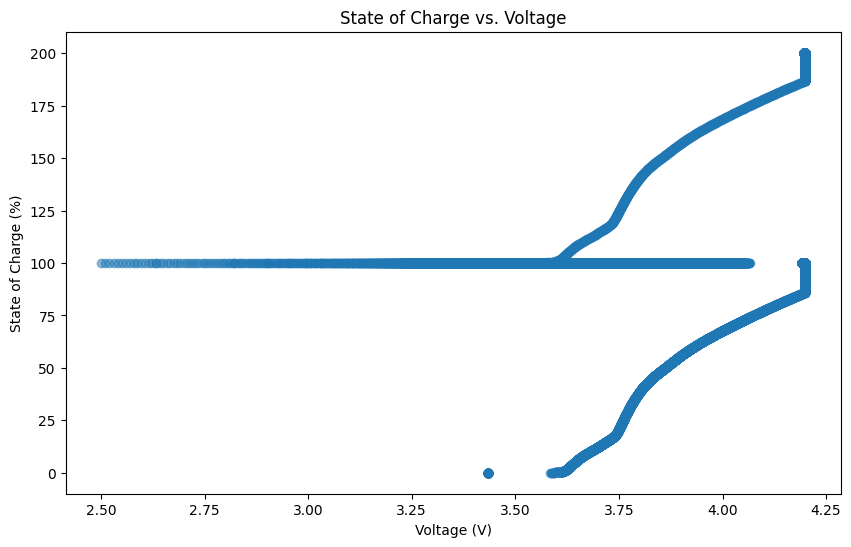

In [15]:
# 1. SOC vs. Voltage
plt.figure(figsize=(10, 6))
plt.scatter(df['Voltage(V)'], df['SOC'], alpha=0.5)
plt.title('State of Charge vs. Voltage')
plt.xlabel('Voltage (V)')
plt.ylabel('State of Charge (%)')
plt.savefig('soc_vs_voltage.png')


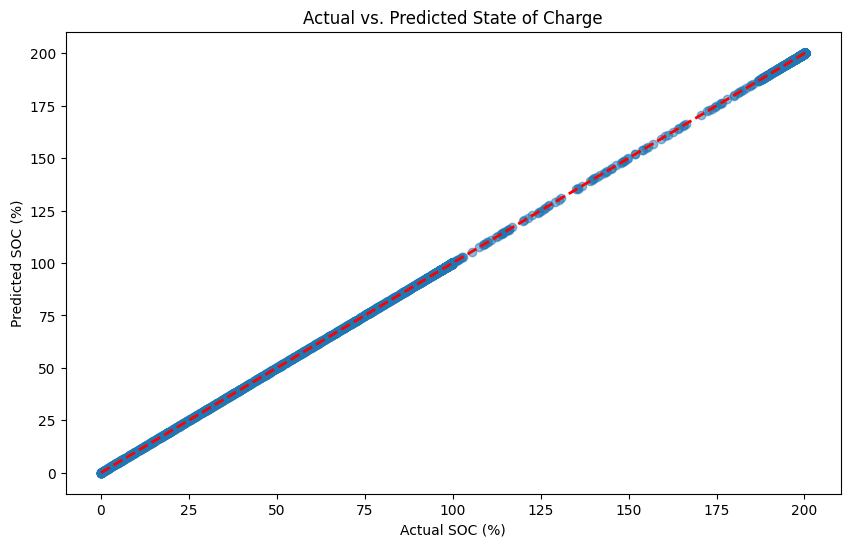

In [14]:
# 3. Actual vs. Predicted SOC
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted State of Charge')
plt.xlabel('Actual SOC (%)')
plt.ylabel('Predicted SOC (%)')
plt.savefig('actual_vs_predicted_soc.png')


In [10]:
# Feature importance
feature_importance = pd.DataFrame({'feature': features, 'importance': rf_model.feature_importances_})
print(feature_importance.sort_values('importance', ascending=False))

                    feature    importance
2       Charge_Capacity(Ah)  9.814281e-01
5              Step_Time(s)  9.695899e-03
0                Voltage(V)  8.161929e-03
1                Current(A)  7.140254e-04
4  Internal_Resistance(Ohm)  5.654137e-14
3    Discharge_Capacity(Ah)  8.165598e-15


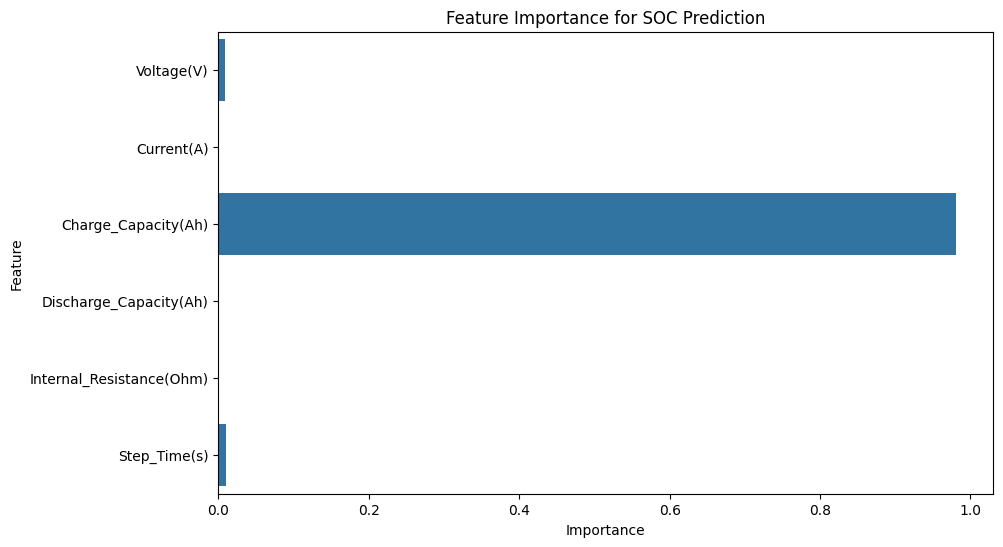

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance for SOC Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('feature_importance.png')

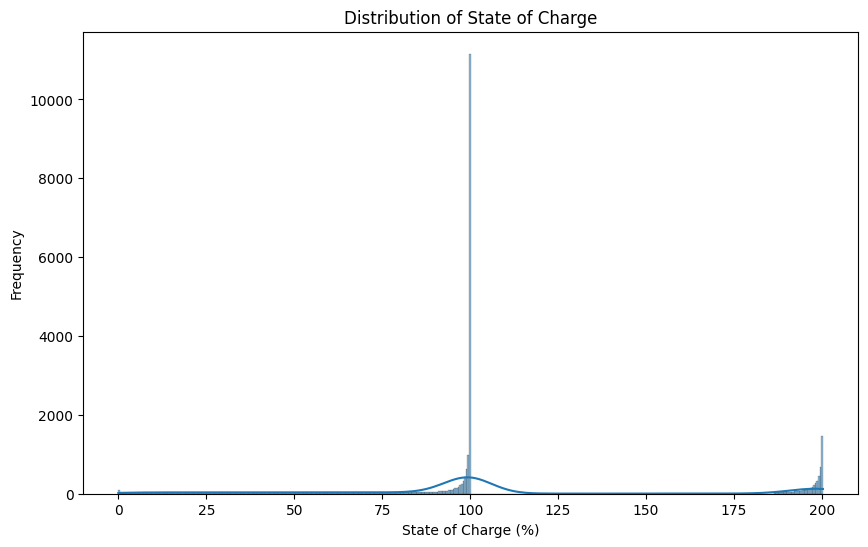

In [17]:
# 5. SOC Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['SOC'], kde=True)
plt.title('Distribution of State of Charge')
plt.xlabel('State of Charge (%)')
plt.ylabel('Frequency')
plt.savefig('soc_distribution.png')


In [11]:
# Function to predict SOC for new data
def predict_soc(new_data):
    new_data_scaled = scaler.transform(new_data)
    return rf_model.predict(new_data_scaled)

# Example usage
new_battery_data = pd.DataFrame({
    'Voltage(V)': [3.8],
    'Current(A)': [0.5],
    'Charge_Capacity(Ah)': [1.5],
    'Discharge_Capacity(Ah)': [0.5],
    'Internal_Resistance(Ohm)': [0.1],
    'Step_Time(s)': [3600]
})

predicted_soc = predict_soc(new_battery_data)
print(f"Predicted SOC: {predicted_soc[0]:.2f}%")

Predicted SOC: 68.64%


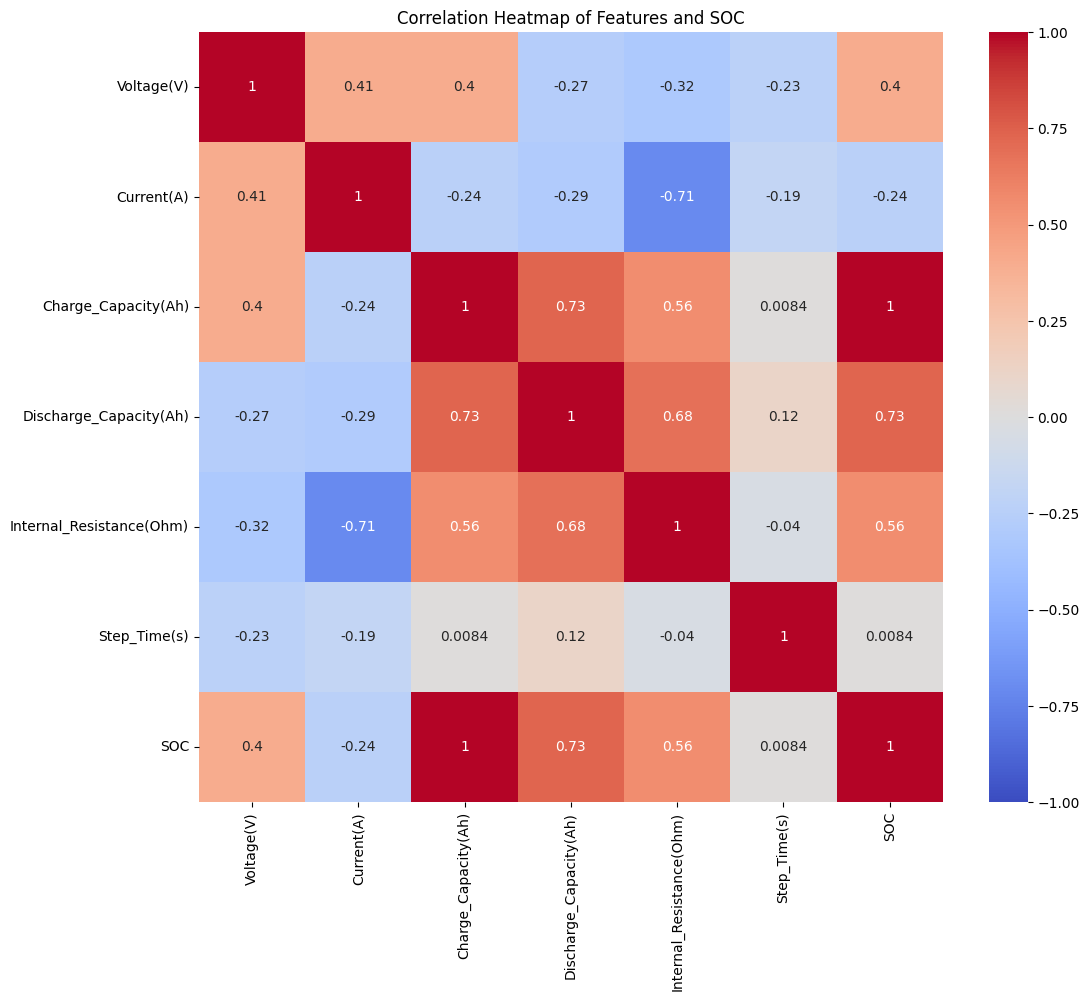

In [19]:
# 6. Correlation Heatmap
correlation_matrix = df[features + ['SOC']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Features and SOC')
plt.savefig('correlation_heatmap.png')